# **An Advanced Machine  Learning Approach for Enhancing Phishing Website Detection**

###  Import Libraries

In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.tree import DecisionTreeClassifier


<ipython-input-172-c1f45e437bb7>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  -------------------------- **Module 1** ------------------------------

## Data collection
#### - The dataset is from Kaggle
#### - It consists of around 5000 legitimate websites and 5000 phishing websites which are merged together

In [ ]:
# Reading the dataset
Data = pd.read_csv("/content/drive/MyDrive/Test1/Dataset.csv")
Data

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


##Data Cleaning
#### -  To remove any unnecessary values which may effect the Prediction
#### - To find basic information of the dataset used  


In [ ]:
Data = Data.drop(['ExtMetaScriptLinkRT','AbnormalExtFormActionR','PctExtResourceUrlsRT','UrlLengthRT','SubdomainLevelRT','ImagesOnlyInForm','MissingTitle','IframeOrFrame','SubmitInfoToEmail','PopUpWindow','RightClickDisabled','FakeLinkInStatusBar','FrequentDomainNameMismatch','PctNullSelfRedirectHyperlinks','AbnormalFormAction','ExtFormAction','RelativeFormAction','PctExtResourceUrls','PctExtHyperlinks','QueryLength','PathLength','HostnameLength','NumNumericChars','PctExtNullSelfRedirectHyperlinksRT'], axis = 1)


In [ ]:
# First 5 elements of the dataset
Data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,ExtFavicon,InsecureForms,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,0,0,1,0,0,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,1,0,0,0,1,1,1,1
4,5,3,0,4,46,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# Last 5 elements of the dataset
Data.tail()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,ExtFavicon,InsecureForms,CLASS_LABEL
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9999,10000,3,1,2,52,3,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
#Dimentions
Data.size

260000

In [ ]:
Data.shape

(10000, 26)

In [ ]:
#information about the dataframe
Data.info

<bound method DataFrame.info of          id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0         1        3               1          5         72        0   
1         2        3               1          3        144        0   
2         3        3               1          2         58        0   
3         4        3               1          6         79        1   
4         5        3               0          4         46        0   
...     ...      ...             ...        ...        ...      ...   
9995   9996        3               1          1         50        0   
9996   9997        2               1          4         59        1   
9997   9998        2               1          4         57        0   
9998   9999        3               1          1         49        0   
9999  10000        3               1          2         52        3   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  IpAddress  \
0                     0         0            0              0  ...          0   
1                     0         0            0              2  ...          0   
2                     0         0            0              0  ...          0   
3                     0         0            0              0  ...          0   
4                     0         0            0              0  ...          0   
...                 ...       ...          ...            ...  ...        ...   
9995                  0         0            0              0  ...          0   
9996                  0         0            0              0  ...          0   
9997                  0         0            0              0  ...          0   
9998                  0         0            0              0  ...          0   
9999                  0         0            0              0  ...          0   

      DomainInSubdomains  DomainInPaths  HttpsInHostname  DoubleSlashInPath  \
0                      0              0                0                  0   
1                      0              0                0                  0   
2                      0              0                0                  0   
3                      0              1                0                  0   
4                      0              1                0                  0   
...                  ...            ...              ...                ...   
9995                   0              0                0                  0   
9996                   0              1                0                  0   
9997                   0              0                0                  0   
9998                   0              0                0                  0   
9999                   0              1                0                  0   

      NumSensitiveWords  EmbeddedBrandName  ExtFavicon  InsecureForms  \
0                     0                  0           1              1   
1                     1                  0           0              1   
2                     0                  0           1              1   
3                     0                  1           1              1   
4                     0                  0           0              0   
...                 ...                ...         ...            ...   
9995                  0                  0           1              1   
9996                  0                  0           0              1   
9997                  0                  0           0              1   
9998                  0                  0           0              1   
9999                  0                  0           0              1   

      CLASS_LABEL  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
9995            0  
9996            0  
9997            0  
9998            0  
9999            0  

[10000 rows x 26 columns]>

In [ ]:
# This methos is used give the statistical information about the dataset
Data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,ExtFavicon,InsecureForms,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.017200,0.022200,0.428900,0.0,0.000900,0.109300,0.057100,0.167200,0.844000,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.130023,0.147341,0.494944,0.0,0.029988,0.368737,0.232045,0.373173,0.362873,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.000000,1.000000,0.0,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# checking for null values
Data.isnull().sum()

id                    0
NumDots               0
SubdomainLevel        0
PathLevel             0
UrlLength             0
NumDash               0
NumDashInHostname     0
AtSymbol              0
TildeSymbol           0
NumUnderscore         0
NumPercent            0
NumQueryComponents    0
NumAmpersand          0
NumHash               0
NoHttps               0
RandomString          0
IpAddress             0
DomainInSubdomains    0
DomainInPaths         0
HttpsInHostname       0
DoubleSlashInPath     0
NumSensitiveWords     0
EmbeddedBrandName     0
ExtFavicon            0
InsecureForms         0
CLASS_LABEL           0
dtype: int64

###  ----------------------------------  **Module 2** -------------------------------------------

###**Exploratory Data Analysis**

<Axes: xlabel='CLASS_LABEL', ylabel='count'>

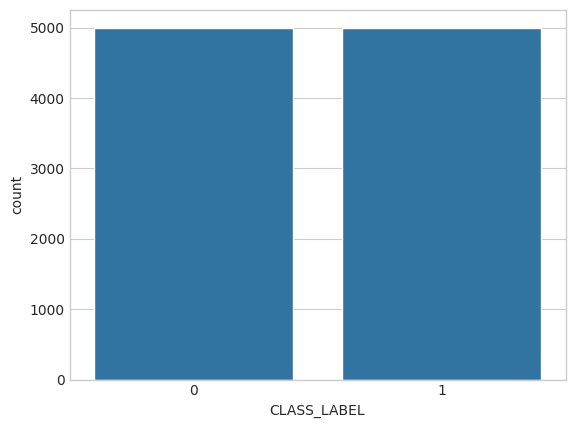

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='CLASS_LABEL',data=Data)

<ipython-input-184-7b711dfe0502>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['CLASS_LABEL'], color='darkred')


<Axes: xlabel='CLASS_LABEL', ylabel='Density'>

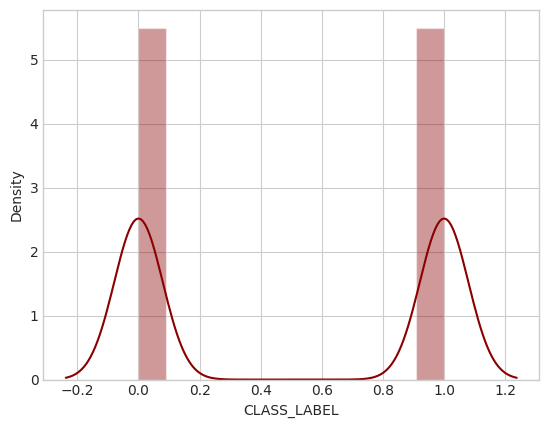

In [ ]:
sns.distplot(Data['CLASS_LABEL'], color='darkred')


In [ ]:
# Shuffling the datasets as the first 5000 rows consists of legitimate urls and the next 5000 rows consists of phishing urls
# Inorder to make sure the proper splitting of testing and training dataset
Data = Data.sample(frac=1).reset_index(drop=True)

In [ ]:
Data

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,ExtFavicon,InsecureForms,CLASS_LABEL
0,2754,3,1,1,38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,5902,1,0,4,86,6,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,5330,2,1,5,65,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2084,5,1,5,73,2,1,0,0,0,...,0,0,1,0,0,0,1,0,1,1
4,5668,3,1,2,80,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9818,2,1,2,56,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9996,9093,1,0,2,35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9997,7427,2,1,4,114,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
9998,8759,1,0,3,47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## **Visualizing the data**



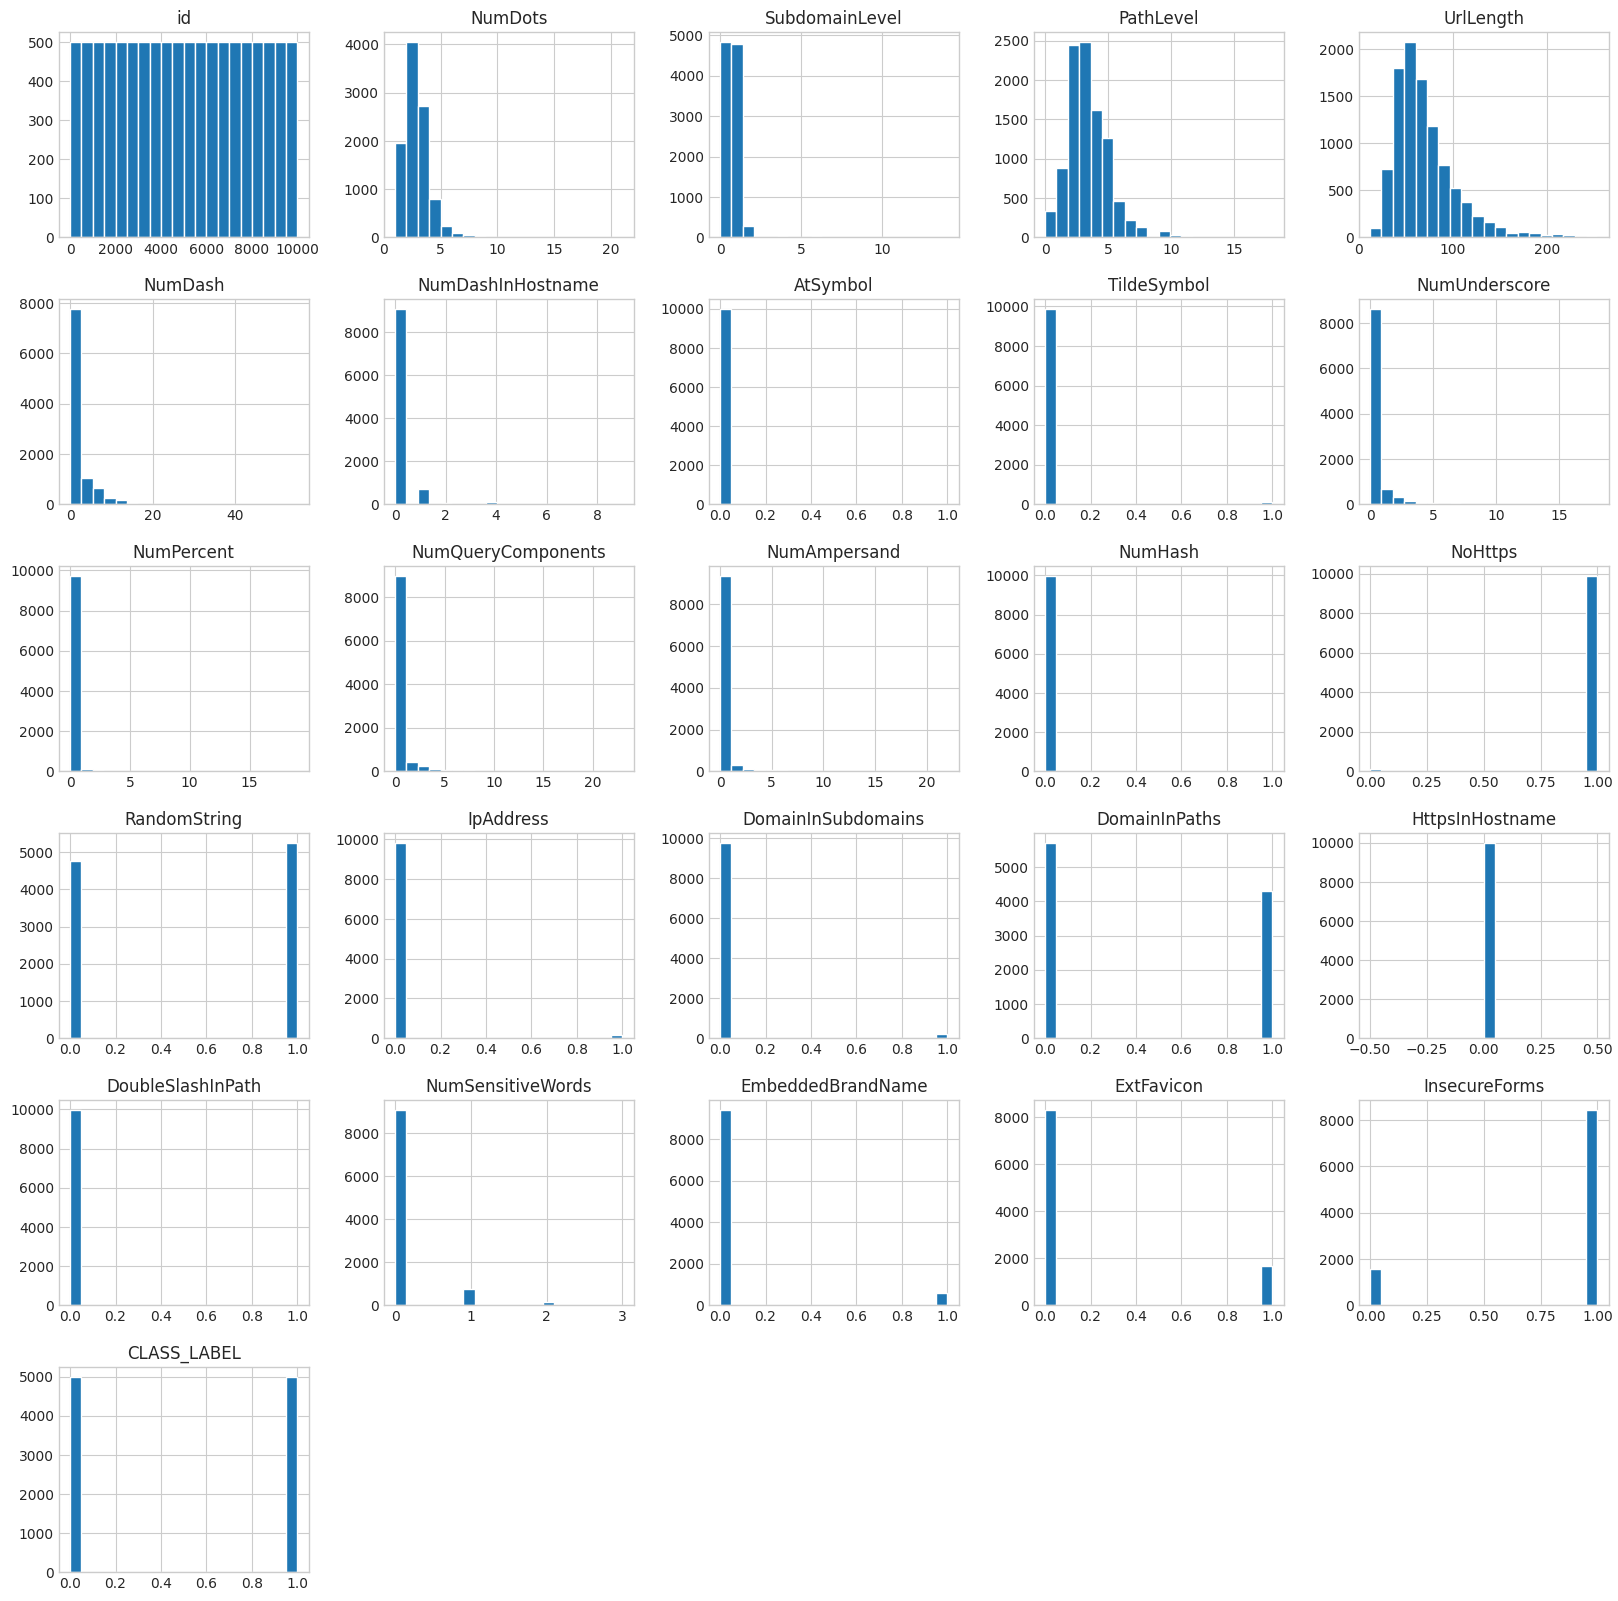

In [ ]:
# Histogram
Data.hist(bins = 20,figsize = (20,20))
plt.show()

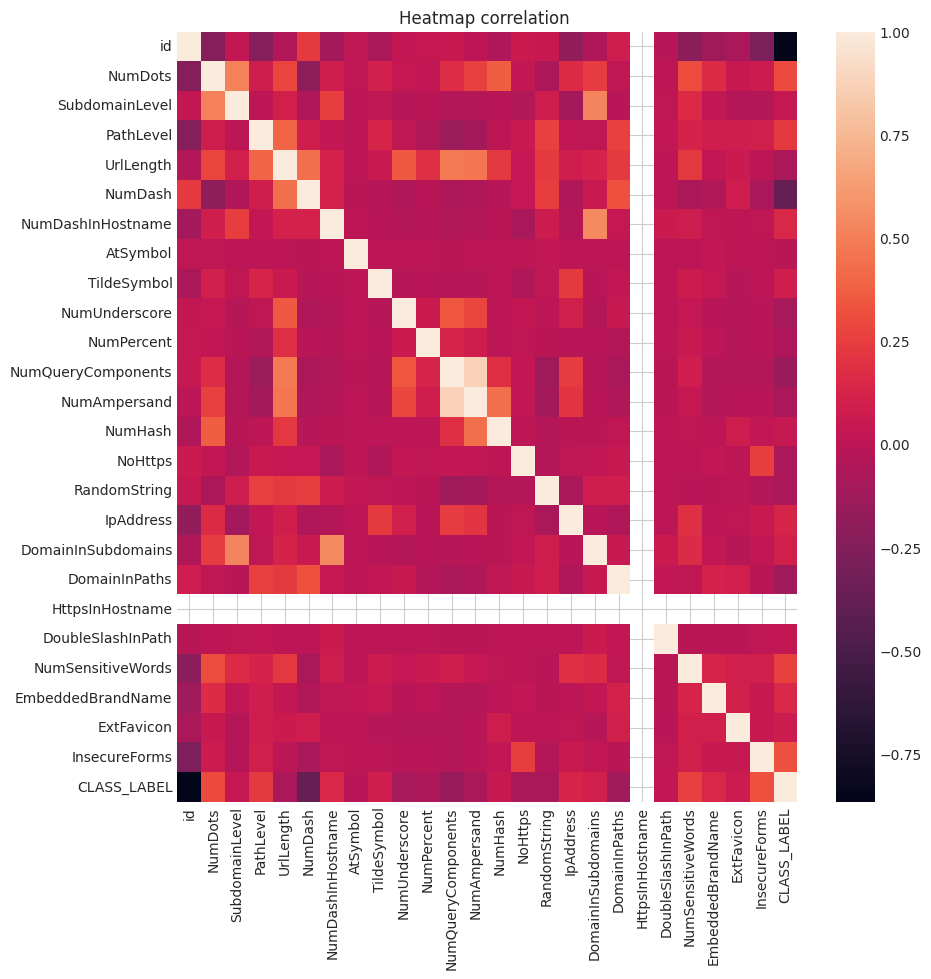

In [ ]:
# Heatmap correlation
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr())
plt.title("Heatmap correlation ")
plt.show()

###  ----------------------------------  **Module 3** -------------------------------------------

## **Data Preprocessing**
####  - The variables which are required for detecting  phising websites will be idetified
####  - After identifying the reqired variables the data will be split into training and testing datasets

In [ ]:
# Denoting target column "CLASS_LABEL" which is used to determing phising is given to the parameters X and Y
# splitting the data into data with "CLASS_LABEL" and data without "CLASS_LABEL"
X = Data.drop('CLASS_LABEL',axis=1)
Y = Data['CLASS_LABEL']

In [ ]:
# size and shape of X and Y
print("The size of X parameter is " , X.size)
print("The size of Y parameter is " , Y.size)
print("The size of X parameter is " , X.shape)
print("The size of Y parameter is " , Y.shape)

The size of X parameter is  250000
The size of Y parameter is  10000
The size of X parameter is  (10000, 25)
The size of Y parameter is  (10000,)


## **Splitting the data**
####  - Splitting the Dataset into training and testing
####  - Ratio of testing and training datset is 70:30


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y ,test_size=0.30, random_state=110)


###  ---------------------------------- **Module 4**-------------------------------------------

## **Machine Learning Models & Training**
####  - Different Advanced  models will be applied for training and testing data
####  The Advanced Models used  in this notebook are:
* Multi layer Perceptron classifier
* Stochastic Gradient Descent
* XGBoost
* Ensemble Adaboost Classifier


### **1.Multi layer Perceptron classifier**

In [ ]:
# classification mlp model for the  dataset
from numpy import unique
from numpy import argmax
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
n_class = len(unique(Y))
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))


In [ ]:
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')


In [ ]:
# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=2)


Epoch 1/10
219/219 - 1s - loss: 8.0930 - 1s/epoch - 5ms/step
Epoch 2/10
219/219 - 0s - loss: 0.4694 - 383ms/epoch - 2ms/step
Epoch 3/10
219/219 - 0s - loss: 0.4119 - 345ms/epoch - 2ms/step
Epoch 4/10
219/219 - 0s - loss: 0.3938 - 307ms/epoch - 1ms/step
Epoch 5/10
219/219 - 0s - loss: 0.3799 - 315ms/epoch - 1ms/step
Epoch 6/10
219/219 - 0s - loss: 0.3438 - 351ms/epoch - 2ms/step
Epoch 7/10
219/219 - 0s - loss: 0.3262 - 452ms/epoch - 2ms/step
Epoch 8/10
219/219 - 0s - loss: 0.2987 - 409ms/epoch - 2ms/step
Epoch 9/10
219/219 - 1s - loss: 0.3053 - 528ms/epoch - 2ms/step
Epoch 10/10
219/219 - 1s - loss: 0.2700 - 600ms/epoch - 3ms/step


**Performance Evaluation:**

In [ ]:
# evaluate on test set
yhat = model.predict(X_test)
yhat = argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(Y_test, yhat)
print('Accuracy of the model : %.3f' % acc)

94/94 [==============================] - 0s 3ms/step
Accuracy of the model : 0.888


## **2.Stochastic Gradient Descent**



In [ ]:
from sklearn.svm import SVC


In [ ]:
svc=SVC()
model_5=svc.fit(X_train , Y_train)

In [ ]:
svm_predict=model_5.predict(X_test)


**Performance Evaluation:**

In [ ]:
# evaluate on test set
print('The accuracy of SVM Classifier is: ', 100.0 * accuracy_score(svm_predict,Y_test))


The accuracy of SVM Classifier is:  99.86666666666667


In [ ]:
print(classification_report(svm_predict,Y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1514
           1       1.00      1.00      1.00      1486

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



### **3.XGboost**

In [ ]:
from xgboost import XGBClassifier


In [ ]:
xgb=XGBClassifier()
model_7=xgb.fit(X_train,Y_train)

In [ ]:
xgb_predict=model_7.predict(X_test)


**Performance Evaluation:**

In [ ]:
print('The accuracy of XGBoost Classifier is: ' , 100.0 * accuracy_score(xgb_predict,Y_test))


The accuracy of XGBoost Classifier is:  100.0


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


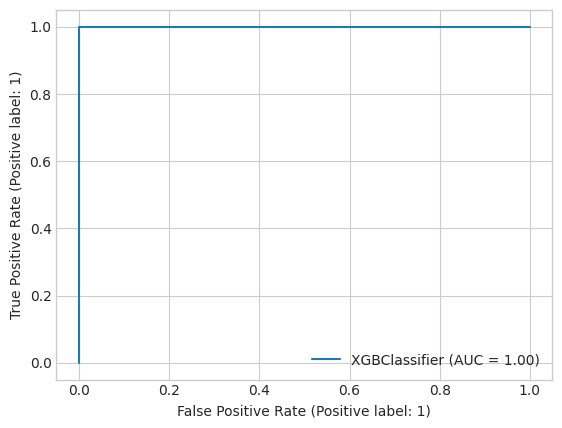

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model_7, X_test, Y_test)


###**Adaboost**

In [ ]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

# define the model
model = AdaBoostClassifier()



**Performance Evaluation:**

In [ ]:
# evaluate the model for training and testing dataset
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=2)
n_scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores1 =cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-2, error_score='raise')

# Accuracy of the training and testing dataset
print('Accuracy of the training dataset: %.3f(%.3f)' % (mean(n_scores), std(n_scores)))
print('Accuracy of the testing dataset: %.3f(%.3f)' % (mean(n_scores1), std(n_scores1)))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Accuracy of the training dataset: 1.000(0.000)
Accuracy of the testing dataset: 1.000(0.001)


### **Ensemble Tree depth effect**

In [ ]:
# explore adaboost ensemble tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
  X = Data.drop('CLASS_LABEL',axis=1)
  Y = Data['CLASS_LABEL']

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,11):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models


**Performance Evaluation:**

In [ ]:
print("The performance evaluation of training dataset ")
# evaluate a given model using cross-validation
def evaluate_model(model, X_train, Y_train):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

 # get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, Y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

The performance evaluation of training dataset 
>1 1.000 (0.000)
>2 1.000 (0.000)
>3 1.000 (0.000)
>4 1.000 (0.000)
>5 1.000 (0.000)
>6 1.000 (0.000)
>7 1.000 (0.000)
>8 1.000 (0.000)
>9 1.000 (0.000)
>10 1.000 (0.000)


The performatce box plot of training dataset 


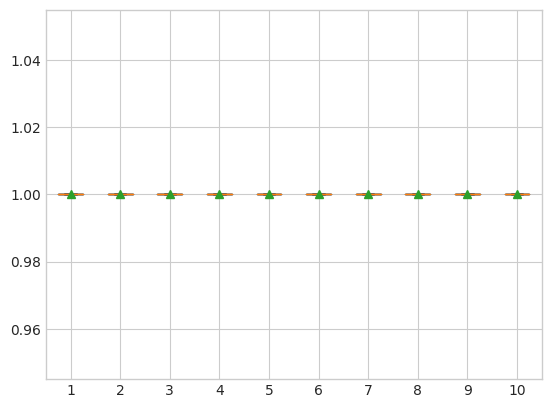

In [ ]:
#plot model performance for comparison
print("The performatce box plot of training dataset ")
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###  ----------------------------------  **Module 5**-------------------------------------------

### Comparison graph of Perfomance and Accuracy Prediction

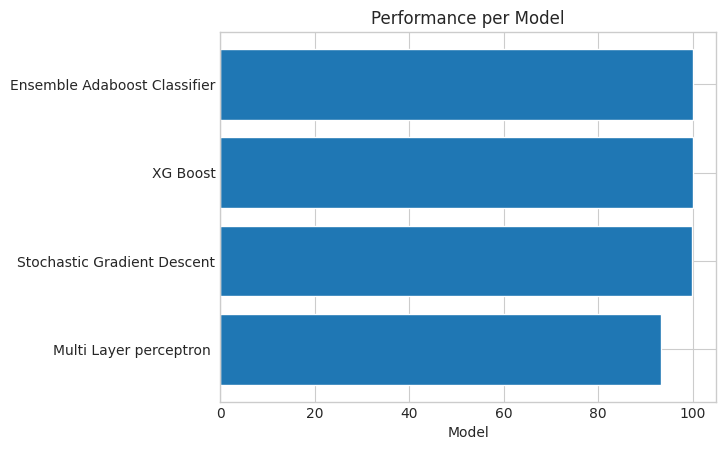

<Figure size 640x480 with 0 Axes>

In [ ]:

objects = ('Multi Layer perceptron ','Stochastic Gradient Descent','XG Boost','Ensemble Adaboost Classifier')
y_pos = np.arange(len(objects))
performance = [93.25,99.93,99.966,99.99]
plt.barh(y_pos, performance, align='center', alpha=1.0)
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.xlabel('Model')
plt.title('Performance per Model')

plt.show()
plt.savefig('accuracy_per_model.png')

#  ---------------------------------- **THANK YOU**-------------------------------------------

In [ ]:
##